📁 Upload two images (query and target):


Saving querypng to querypng (3)
Saving target.png to target (3).png


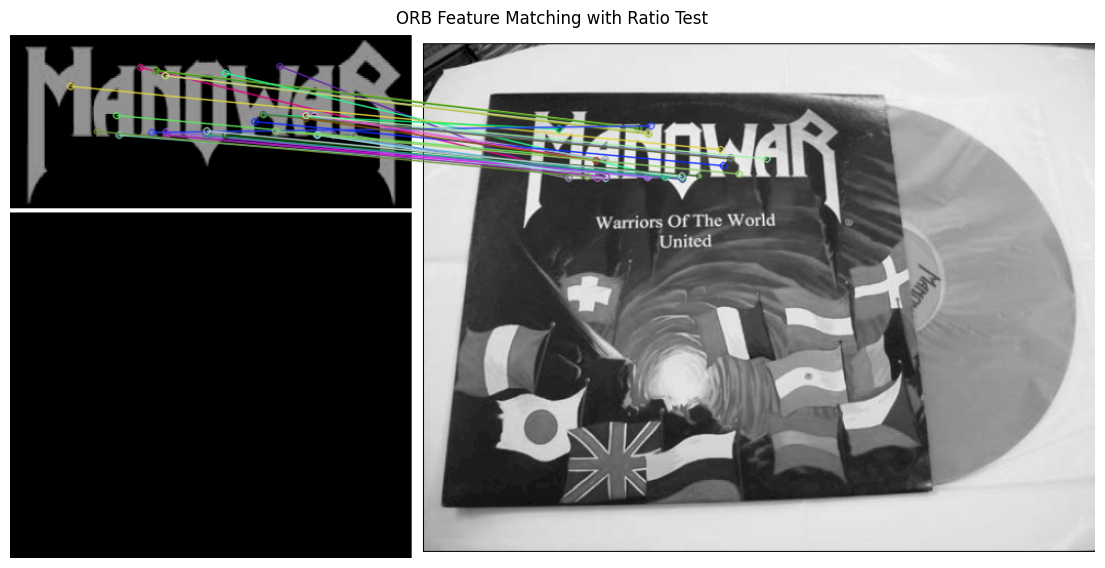

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Step 1: Upload two images
print("📁 Upload two images (query and target):")
uploaded = files.upload()
file_names = list(uploaded.keys())

if len(file_names) != 2:
    raise Exception("❗ Please upload exactly two images.")

# Step 2: Read as grayscale
img1 = cv2.imread(file_names[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(file_names[1], cv2.IMREAD_GRAYSCALE)

# Step 3: Detect keypoints and descriptors with ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Step 4: Create BFMatcher and use knnMatch
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)

# Step 5: Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])  # wrapped in list for drawMatchesKnn

# Step 6: Draw good matches only
img_matches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Step 7: Display result
plt.figure(figsize=(14, 7))
plt.imshow(img_matches)
plt.axis("off")
plt.title("ORB Feature Matching with Ratio Test")
plt.show()
